In [54]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 6*x**2 + 4*x + 2

plt.style.use("dark_background")

Text(0.5, 1.0, 'range between: -100,100')

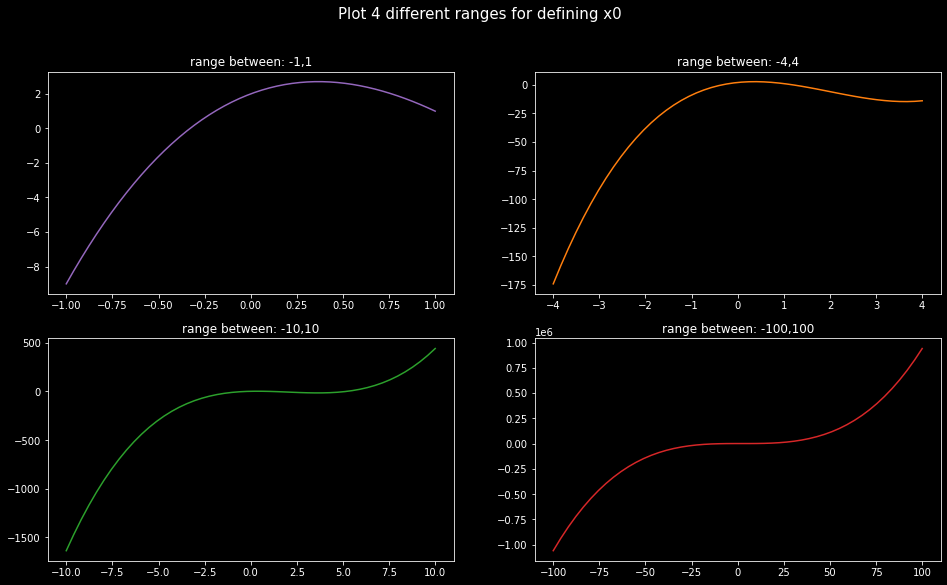

In [55]:
x1 = np.linspace(-1, 1)
x2 = np.linspace(-4, 4)
x3 = np.linspace(-10, 10)
x4 = np.linspace(-100, 100)

fig, ax = plt.subplots(2,2,figsize=(16,9))
fig.suptitle("Plot 4 different ranges for defining x0", size=15)

ax[0,0].plot(x1, f(x1), 'tab:purple')
ax[0,0].set_title("range between: -1,1")

ax[0,1].plot(x2, f(x2), 'tab:orange')
ax[0,1].set_title("range between: -4,4")

ax[1,0].plot(x3, f(x3), 'tab:green')
ax[1,0].set_title("range between: -10,10")


ax[1,1].plot(x4, f(x4), 'tab:red')
ax[1,1].set_title("range between: -100,100")

In [56]:
def fprime(x):
    return 3*x**2-12*x+4

def fsecond(x):
    return 6*x - 12

def quadratic_approx(x, x0, f, fprime, fsecond):
    return f(x0) + fprime(x0) * (x - x0) + 0.5 * fsecond(x0) * (x - x0)**2

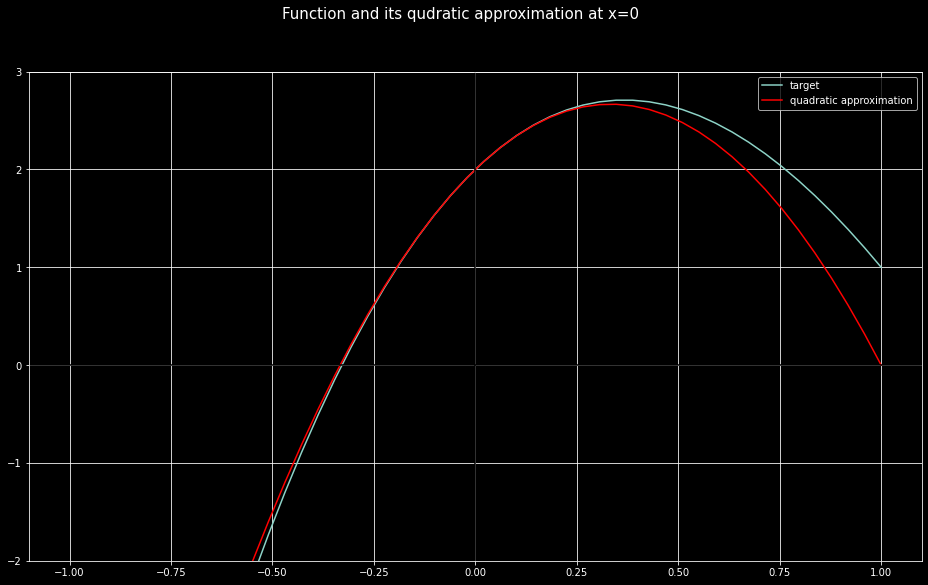

In [57]:
fig, ax = plt.subplots(figsize=(16,9))
x = np.linspace(-1, 1)
ax.plot(x, f(x), label='target')
ax.grid()
x0 = 0
ax.plot(x, quadratic_approx(x, x0, f, fprime, fsecond), color='red', label='quadratic approximation')
ax.set_ylim([-2,3])
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
fig.suptitle(f"Function and its qudratic approximation at x={x0}", fontsize=15)
plt.legend()

In [58]:
def newton(x0, fprime, fsecond, maxiter=100, eps=0.0001):
    x=x0
    iterations = 0
    for i in range(maxiter):
        iterations = i + 1
        xnew = x - (fprime(x)/fsecond(x))
        if i % 10 == 0: print('Loss is %s at iteration %i' % ((xnew - x), i))
        if xnew - x < eps:
            print('converged at iteration', iterations)
            return xnew
            break
        x = xnew
    return x

In [59]:
x0 = 0
newton(x0, fprime, fsecond)

Loss is 0.3333333333333333 at iteration 0
converged at iteration 4


0.36700683814454754

Loss is 0.3333333333333333 at iteration 0
converged at iteration 4


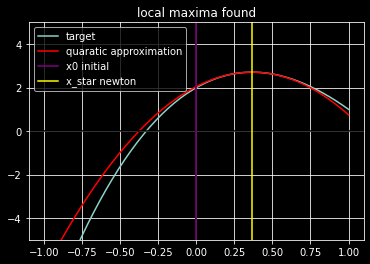

In [60]:
x_star = newton(x0, fprime, fsecond)
fig, ax = plt.subplots()
x = np.linspace(-1,1)
ax.plot(x, f(x), label='target')
ax.grid()

ax.plot(x, quadratic_approx(x, x_star , f, fprime, fsecond), color='red', label='quaratic approximation')
ax.set_ylim([-5,5])
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axvline(x = x0, color='purple', label='x0 initial')
ax.axvline(x = x_star, color='yellow', label='x_star newton')
plt.title("local maxima found")
plt.legend()

Loss is 2.416666666666666 at iteration 0
converged at iteration 2
x_star 3.9154761904761903


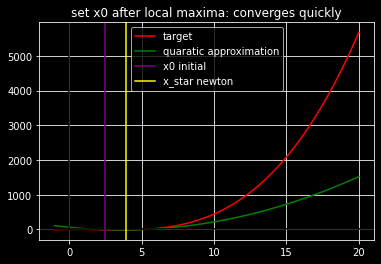

In [61]:
x0 = 2.5
x_star = newton(x0, fprime, fsecond)
print("x_star", x_star)
x = np.linspace(-1, 20)
fig, ax = plt.subplots()
ax.plot(x, f(x), label='target', color="red")
ax.grid()

ax.plot(x, quadratic_approx(x, x_star , f, fprime, fsecond), color='green', label='quaratic approximation')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axvline(x = x0, color='purple', label='x0 initial')
ax.axvline(x = x_star, color='yellow', label='x_star newton')
plt.title("set x0 after local maxima: converges quickly")
plt.legend()

### Observation
- This newton method looks for the maximum and if we start at 2.5 we end in 3.9 since the gradient converges quickly with only 2 iterations

In [62]:
def newton2(x0, fprime, fsecond, maxiter=100, eps=0.0001):
    x=x0
    iterations = 0
    for i in range(maxiter):
        iterations = i + 1
        xnew = x - (f(x)/fprime(x))
        if i % 10 == 0: print('Loss is %s at iteration %i' % ((xnew - x), i))
        if xnew - x < eps:
            print('converged at iteration', iterations)
            return xnew
            break
        x = xnew
    return x

Loss is -0.75 at iteration 0
converged at iteration 1
x_star 1.25 -0.421875


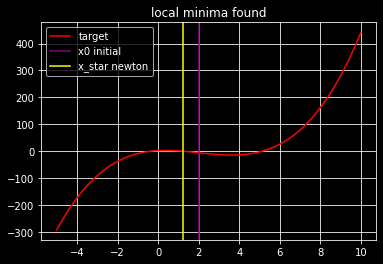

In [63]:
x0 = 2
x_star = newton2(x0, fprime, fsecond)
print("x_star", x_star, f(x_star))

fig, ax = plt.subplots()
x = np.linspace(-5, 10)
ax.plot(x, f(x), label='target', color="red")
ax.grid()

ax.axvline(x = x0, color='purple', label='x0 initial')
ax.axvline(x = x_star, color='yellow', label='x_star newton')
plt.title("local minima found")
plt.legend()